In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [18]:
# Seaborn
rc = {
    "axes.facecolor": "#243139",
    "figure.facecolor": "#243139",
    "axes.edgecolor": "#000000",
    "grid.color": "#000000",
    "font.family": "arial",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#FFFFFF",
    "ytick.color": "#FFFFFF",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

# Useful line of code to set the display option so we could see all the columns in pd dataframe
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [19]:
original = pd.read_csv('data/jm1.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
n_cols = train.columns[1:-1] #Pertinent training variables

#Null Values in Each df
dataframes = {'original': original, 'train': train, 'test': test}
result = {name: df.isna().sum() for name, df in dataframes.items()}
result_df = pd.DataFrame(result)
result_df

,original,train,test
b,0.00,0,0.00
branchCount,0.00,0,0.00
d,0.00,0,0.00
defects,0.00,0,NaN
e,0.00,0,0.00
ev(g),0.00,0,0.00
i,0.00,0,0.00
id,NaN,0,0.00
iv(g),0.00,0,0.00
l,0.00,0,0.00


In [20]:
train = pd.concat([train.drop(columns=['id']), original]).reset_index(drop=True)
train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.00,3.00,1.00,2.00,60.00,278.63,0.06,19.56,14.25,"5,448.79",0.09,302.71,17,1,1,0,16.00,9.00,38.00,22.00,5.00,False
1,14.00,2.00,1.00,2.00,32.00,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.00,11.00,18.00,14.00,3.00,False
2,11.00,2.00,1.00,2.00,45.00,197.65,0.11,8.05,22.76,"1,754.01",0.07,97.45,8,0,1,0,12.00,11.00,28.00,17.00,3.00,False
3,8.00,1.00,1.00,1.00,23.00,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.00,6.00,16.00,7.00,1.00,True
4,11.00,2.00,1.00,2.00,17.00,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.00,6.00,10.00,10.00,3.00,False


ValueError: Unable to parse string "?" at position 101906

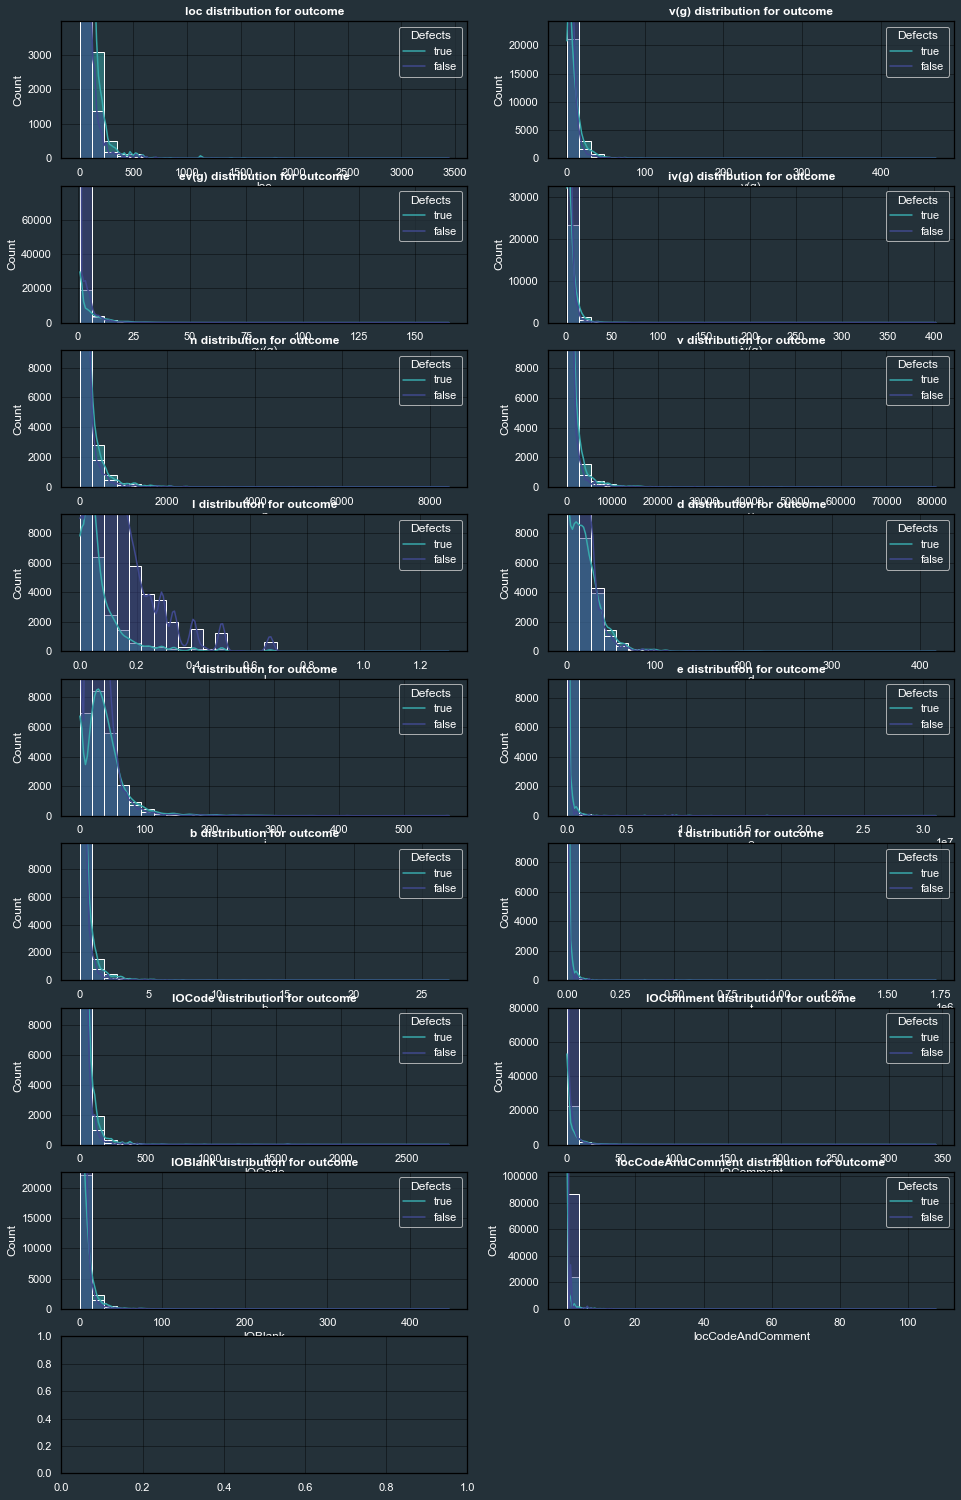

In [21]:
plt.figure(figsize=(16, len(n_cols) * 3))

for i, col in enumerate(n_cols):
    # Plotting for outcome
    plt.subplot(len(n_cols), 2, i+1)
    sns.histplot(x=col, hue="defects", data=train, bins=30, kde=True, palette='mako')
    plt.title(f"{col} distribution for outcome", fontweight="bold", color = 'white')
    plt.ylim(0, train[col].value_counts().max() + 10)
    
    
    plt.legend(title="Defects", loc='upper right', labels=['true', 'false'], labelcolor='white').get_title().set_color("white")
    
plt.tight_layout()
plt.show()

(112648, 23)